## Analysis of General Information Form in MrOS V1 Data (EDA3-V1-FF.ipynb)
The Fracture Form is essential in understanding the occurrence, characteristics, and management of fractures within the study population. It provides valuable insights into the prevalence of fractures, associated risk factors, treatment patterns, and the impact of fractures on the participants' health and well-being.

#### 1. [Installation and Importing of Libraries](#eda_import)
#### 2. [Retreival of Data](#eda_retrieval)
#### 3. [Handling of NAs](#eda_na)
#### 4. [Descriptive Statistics and Visualizations](#eda_describe)

### <a name="eda_import"></a>Installation and Importing of Libraries
In order to both explore and visualize the data, it's necessary for us to load various libraries.  In addition to loading already pre-installed libraries, we've also had to install seaborn for plotting. 

In [1]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.7/site-packages (0.12.2)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d
from scipy.stats import chi2_contingency


### <a name="eda_retrieval"></a>Retreival of Data
The data needs to be retrieved from the Postgres database and stored in a dataframe for us to begin analyzing.

In [4]:
import psycopg2
import sqlalchemy
import getpass

user = "dtfp3"
host = "pgsql.dsa.lan"
database = "casestdysu23t03"
password = getpass.getpass()
connectionstring = "postgresql://" + user + ":" + password + "@" + host + "/" + database
engine = sqlalchemy.create_engine(connectionstring)
connection = None

try:
    connection = engine.connect()
except Exception as err:
    print("An error has occurred trying to connect: {}".format(err))

del password

········


In [6]:
query = "SELECT * FROM public.v1_form_gi"
form_gi_df = pd.read_sql_query(query, con=connection)

In [8]:
form_gi_df.shape

(5994, 16)

### <a name="eda_na"></a>Handling of NAs
After reviewing, the GI form has a high completion rate meaning it won't be necessary to do additional processing on the NA values. 

In [9]:
form_gi_df.isna().sum().T

ID          0
GIMSTAT     0
GILIVE      0
GIEDUC      0
GISOC       0
GIWHITE     0
GIAA        0
GIASIAN     0
GIHISPA     0
GIAI        0
GIPI        0
GIAGE1      0
GIAGE1RG    0
GIRACE      0
GIERACE     0
GI          0
dtype: int64

<a name="eda_describe"></a><h3> Descriptive Statistics and Visualizations </h3>
Below are a set of descriptive statistics meant to familiarize the audience

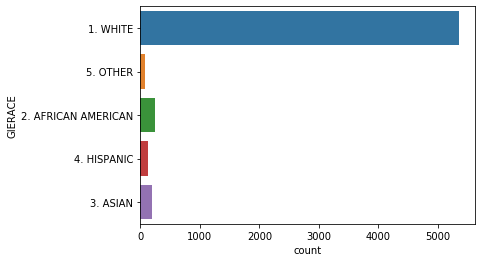

In [10]:
sns.countplot(data=form_gi_df,y="GIERACE")

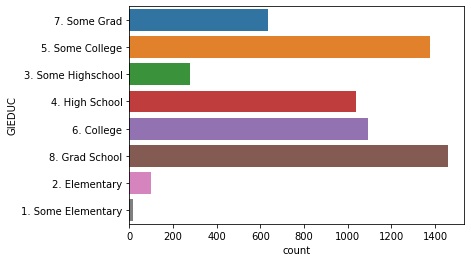

In [11]:
sns.countplot(data=form_gi_df,y="GIEDUC")

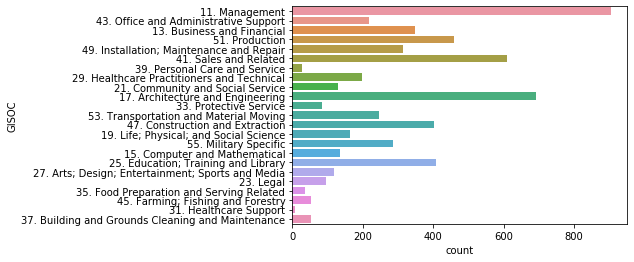

In [12]:
sns.countplot(data=form_gi_df, y="GISOC")

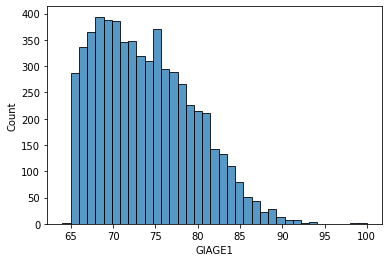

In [13]:
sns.histplot(data=form_gi_df, x="GIAGE1")

In [16]:
# Review analysis with the merged datasets
def binary2StringLiteral(df):
    for column in df.columns:
        if df[column].dtype == "object":
            df[column] = df[column].str.decode('utf-8')

fafeb23_df = pd.read_sas("/dsa/groups/casestudy2023su/team03/FAFEB23.SAS7BDAT")
fafeb23_df = fafeb23_df[["ID","FANOTMOF"]]
binary2StringLiteral(fafeb23_df)

mergedData = form_gi_df.merge(fafeb23_df,on="ID",how="inner")

In [17]:
mergedData = mergedData.dropna()

In [18]:
pd.crosstab(mergedData.FANOTMOF,mergedData.GIEDUC)

GIEDUC,1. Some Elementary,2. Elementary,3. Some Highschool,4. High School,5. Some College,6. College,7. Some Grad,8. Grad School
FANOTMOF,,,,,,,,
0.0,17,86,250,924,1214,939,551,1268
1.0,0,10,27,100,147,139,73,170


In [19]:
pd.crosstab(mergedData.FANOTMOF,mergedData.GIEDUC,normalize="index")

GIEDUC,1. Some Elementary,2. Elementary,3. Some Highschool,4. High School,5. Some College,6. College,7. Some Grad,8. Grad School
FANOTMOF,,,,,,,,
0.0,0.003239,0.016384,0.047628,0.176034,0.231282,0.178891,0.104972,0.241570
1.0,0.000000,0.015015,0.040541,0.150150,0.220721,0.208709,0.109610,0.255255


In [20]:
contingency = pd.crosstab(mergedData[mergedData.GIEDUC != "1. Some Elementary"].FANOTMOF,mergedData[mergedData.GIEDUC != "1. Some Elementary"].GIEDUC)
res = chi2_contingency(contingency)

In [21]:
pd.DataFrame(res[3])

,0,1,2,3,4,5,6
0,85.159715,245.721261,908.370295,1207.316378,956.272635,553.538149,1275.621567
1,10.840285,31.278739,115.629705,153.683622,121.727365,70.461851,162.378433


In [22]:
res[1]*100

34.83289303295525

In [23]:
res[0]

6.711748646581272